In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt

/home/nkolln/mt/vis10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Data
dataset_path = '~/datasets'
batch_size = 100

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=True)

In [ ]:
#Overall architecture
class EncoderDecoder(nn.Module):
    def __init__(self,encoder,decoder):
        super(EncoderDecoder,self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self,x):
        z = self.encoder(x)
        x_reconstr = self.decoder(z)

        return x_reconstr

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,in_l,hd1,hd2,out_l):
        super(NeuralNet,self).__init__()
        #self.emb = nn.Embedding(in_l, hd1)
        self.l1 = nn.Linear(in_l, hd2)
        self.l2 = nn.Linear(hd2, hd2)
        self.l3 = nn.Linear(hd2, out_l)

    def forward(self, x):
        #x_emb = self.emb(x)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        scaled_output = (F.sigmoid(x) * 2) - 1
        return scaled_output

nnet = NeuralNet(17,_,50,6)

In [63]:
class NeuralNet(nn.Module):
    def __init__(self,in_l,hd1,hd2,out_l):
        super(NeuralNet,self).__init__()
        #self.emb = nn.Embedding(in_l, hd1)
        self.cnn1 = nn.Conv1d(17,34,kernel_size=3,padding=2,dilation=1,stride=1)
        self.cnn2 = nn.Conv1d(34,68,kernel_size=3,padding=2,dilation=1,stride=1)
        self.l1 = nn.Linear(in_l, hd2)
        self.l2 = nn.Linear(hd2, hd2)
        self.l3 = nn.Linear(hd2, out_l)

    def forward(self, x):
        #x_emb = self.emb(x)
        x = x.view(-1,1)
        #print(x.shape)
        x = F.relu(self.cnn1(x))
        x = F.relu(self.cnn2(x))
        x = x.view(-1,340)
        #print(x.shape)
        x = F.relu(self.l1(x))
        #print(x.shape)
        x = F.relu(self.l2(x))
        #print(x.shape)
        x = self.l3(x)
        #print(x.shape)
        scaled_output = (F.sigmoid(x) * 2) - 1
        return scaled_output

nnet = NeuralNet(340,_,170,6)

In [64]:
Hin = 17;padding=2;dilation=1;kernel_size=3;stride= 1
(Hin + 2 * padding - dilation * (kernel_size-1)-1)/(stride+1)

9.0

In [65]:
def loss_function():
    pass

# Define a function to train the model on a single episode of the environment
def train_on_episode(model, env, optimizer,epochs):
    # Run the episode until it is done
    for epoch in range(epochs):
        # Set the model to train mode
        model.train()
        # Reset the environment to the initial state
        state,info = env.reset()
        reward_tot = 0
        for i in range(0,200):
            obs = torch.tensor(state).float()
            action = nnet(obs).tolist()
            action = action[0]
            #print(obs,action,env.action_space.sample())
            #action = env.action_space.sample()# User-defined policy function
            state, reward, terminated, truncated, info = env.step(action)
            if terminated or truncated:
                break
                #observation, info = env.reset()
            #loss = Variable(reward, requires_grad = True)
            reward_tot += reward
        #reward = reward_tot
            reward = torch.tensor(reward)#.item()
            reward.requires_grad_()
            reward.backward()
            optimizer.step()
        #env.close()
        print("\tEpoch: {}\tTotal Reward: {}".format(epoch,reward_tot))
    env.close()
        

model = nnet
epochs = 1000
lr = 1e-1
env = gym.make("HalfCheetah-v4")#, render_mode="human")
opt = torch.optim.Adam(model.parameters(), lr=lr)
train_on_episode(nnet,env,opt,epochs)

/home/nkolln/mt/vis10/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


	Epoch: 0	Total Reward: -0.5308160565465803
	Epoch: 1	Total Reward: -1.1554816808029134
	Epoch: 2	Total Reward: -0.22621101949282554
	Epoch: 3	Total Reward: -0.0898963416554375
	Epoch: 4	Total Reward: -1.1334516851133518
	Epoch: 5	Total Reward: -1.3993815201975168
	Epoch: 6	Total Reward: -0.7188373084585924
	Epoch: 7	Total Reward: -0.4093541668382547
	Epoch: 8	Total Reward: 0.363657004037726
	Epoch: 9	Total Reward: -0.05114483628674678
	Epoch: 10	Total Reward: -1.3183601086549772
	Epoch: 11	Total Reward: 0.3062086899175893
	Epoch: 12	Total Reward: -1.191410950450837
	Epoch: 13	Total Reward: 0.03124578221455684
	Epoch: 14	Total Reward: 0.4304712176410403
	Epoch: 15	Total Reward: -1.443154400242449
	Epoch: 16	Total Reward: 0.7333662027263447
	Epoch: 17	Total Reward: 0.8311456359320191
	Epoch: 18	Total Reward: -1.114263750907404
	Epoch: 19	Total Reward: -0.7402931137608162
	Epoch: 20	Total Reward: 0.9272323098589013
	Epoch: 21	Total Reward: 0.5635858425776844
	Epoch: 22	Total Reward: -1.9

In [34]:
env.close()

In [1]:
#Gym environment example
cuda = False
DEVICE = torch.device("cuda:0" if cuda else "cpu")

import gym
env = gym.make("HalfCheetah-v4", render_mode="human")
observation, info = env.reset(seed=42)
for i in range(100):
    obs = torch.tensor(observation).float()
    action = nnet(obs).tolist()
    #print(obs,action,env.action_space.sample())
    #action = env.action_space.sample()# User-defined policy function
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

NameError: name 'torch' is not defined

In [60]:
env.close()

In [94]:
#Gym environment example
import gym
env = gym.make("HalfCheetah-v4", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
   action = env.action_space.sample()# User-defined policy function
   observation, reward, terminated, truncated, info = env.step(action)
   print(observation)

   if terminated or truncated:
      observation, info = env.reset()
env.close()

[-0.02142928  0.10868776 -0.05879842 -0.15031169  0.165848    0.01237354
 -0.18894416  0.10098599 -0.46656671 -0.37541825  0.97699972 -2.67449492
 -1.92372668  1.48219667 -1.485101   -6.2479751   4.68580017]
[-5.89818948e-02  1.39224262e-01 -5.44681965e-03 -3.62951951e-01
 -7.51213567e-02  2.99481849e-01 -4.14376070e-01  1.49876586e-01
  4.40592815e-01 -1.03470807e+00  2.93186257e-01  1.99221876e+00
 -4.08164131e+00 -6.32226903e+00  8.77539611e+00 -1.63760475e+00
 -1.06261314e+00]
[-1.04491758e-01  6.50560815e-02 -1.24062240e-01 -2.57544500e-02
 -4.17927510e-03  3.57215252e-01 -1.51682236e-01  1.41014823e-01
 -2.32457228e-01 -2.47903564e-01 -2.33508186e+00 -3.74265549e+00
  9.95760703e+00  8.66656114e-01 -1.40365275e+00  4.37458874e+00
 -6.44651307e-01]
[-7.35229501e-02 -2.14126928e-02  2.02645828e-01 -1.62931230e-01
 -3.27794681e-01  1.41944142e-01  3.46102034e-01 -1.05608402e-02
  4.12964499e-01  7.73097849e-01 -1.39218459e+00  9.56008554e+00
 -7.02377377e+00 -7.57651169e+00 -5.14758

/home/nkolln/mt/vis10/lib/python3.10/site-packages/glfw/__init__.py:912: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


[ -0.10300391   0.10695273   0.56410068  -0.11346574  -0.3840571
   0.09373353  -0.135553    -0.24922802   0.38387785  -0.91159878
   0.49466956   7.92765927 -12.72229414  -2.29488995   1.89250099
   1.49965791   2.40557105]
[-0.12508119  0.09189276  0.52387041 -0.42129017 -0.28622385  0.16101184
 -0.29533736 -0.09339661 -0.82589807 -0.34204048 -0.73770342 -5.08010595
 -1.6877039   3.10625884  0.31869884 -2.07550581  5.05772615]
[-1.29429823e-01  1.20952548e-01  1.13635461e-02 -1.00207221e-01
 -1.84939017e-01  1.13062944e-01 -3.85349604e-01 -5.33999741e-02
 -1.39568034e+00 -3.14726373e-02  9.36207162e-01 -1.14958852e+01
  4.08109800e+00  1.05389962e+00 -1.11134118e+00 -1.15969897e+00
 -1.78241841e+00]
[-0.14038697  0.13958488 -0.40687448  0.04851324  0.25774336  0.03895235
 -0.50454904  0.11458864 -0.75485563 -0.10876067  0.4204522  -5.02259115
  1.77857353  8.60185526 -1.68716513 -2.6927819   5.44280791]
[-0.14729012  0.16361618 -0.49435687  0.06642242  0.50150938 -0.18294671
 -0.4706

In [93]:
import gym
env = gym.make('MountainCar-v0')
for i_episode in range(30):
    observation = env.reset()
    for t in range(100):
        env.render()
        #printing the observation space
        print(observation) 
        #storing the number of possible actions
        action = env.action_space.sample() 
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

(array([-0.48626617,  0.        ], dtype=float32), {})


/home/nkolln/mt/vis10/lib/python3.10/site-packages/gym/envs/classic_control/mountain_car.py:171: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


ValueError: too many values to unpack (expected 4)

In [10]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

# Create the neural network
model = Net(4, 32, 2)

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Load the environment
env = gym.make('CartPole-v0')

# Define a function to train the model on a single episode of the environment
def train_on_episode(model, env, optimizer):
    # Reset the environment to the initial state
    state = env.reset()

    # Define a list to store the states, actions, and rewards for the episode
    states = []
    actions = []
    rewards = []

    # Set the model to train mode
    model.train()

    # Run the episode until it is done
    while True:
        # Predict the action probabilities using the model
        action_probs = model(torch.tensor(state, dtype=torch.float))

        # Choose an action randomly according to the predicted probabilities
        action = torch.multinomial(action_probs, 1).item()

        # Take the action and observe the new state, reward, and whether the episode is done
        new_state, reward, done, _ = env.step(action)

        # Add the state, action, and reward to the list
        states.append(state)
        actions.append(action)
        rewards.append(reward)

        # If the episode is done, stop
        if done:
            break

        # Set the new state as the current state
        state = new_state

    # Calculate the discounted rewards for the episode
    discounted_rewards = discount_rewards(rewards, 0.95)

    # Normalize the discounted rewards
    discounted_rewards -= discounted_rewards.mean()
    discounted_rewards /= discounted_rewards.std()

    # Zero the gradients
    optimizer.zero_grad()

    # Use the discounted rewards as the targets for the model
    targets = F.one_hot(torch.tensor(actions), 2) * torch.tensor(discounted_rewards, dtype=torch.float)

    # Compute the loss
    loss = F.mse_loss(model(torch.tensor(states, dtype=torch.float)), targets)

/home/nkolln/mt/vis10/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [80]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for reproducibility
torch.manual_seed(0)

# Create the neural network
model = nn.Sequential(
    nn.Linear(4, 128),
    nn.ReLU(),
    nn.Linear(128, 2)
)

# Set the optimizer
optimizer = optim.Adam(model.parameters())

# Load the CartPole environment from OpenAI Gym
env = gym.make('CartPole-v0')

# Set the number of episodes to train on
num_episodes = 1000

# Train the model
for episode in range(num_episodes):
    # Reset the environment at the start of each episode
    state,info = env.reset()

    # Set the total reward for the episode to 0
    total_reward = 0

    # Run the environment for 200 time steps
    for t in range(200):
        # Render the environment to the screen
        env.render()

        # Convert the state from a NumPy array to a PyTorch tensor
        state = torch.tensor(state).float()

        # Use the model to predict the action probabilities
        action_probs = model(state)

        # Sample an action from the predicted probabilities
        action = action_probs.multinomial(1).item()

        # Take the action in the environment and get the next state and reward
        next_state, reward, done, _ = env.step(action)

        # Add the reward to the total reward for the episode
        total_reward += reward

        # If the episode is done, set the next state to None
        if done:
            next_state = None

        # Store the transition in memory
        memory.push(state, action_probs, action, reward, next_state)

        # Move to the next state
        state = next_state

        # If the episode is done, break out of the loop
        if done:
            break

    # Update the model using the transitions in memory
    optimize_model(memory, model, optimizer)

    # Print the total reward for the episode
    print(f'Episode {episode+1}: total reward = {total_reward}')

# Close the environment
env.close()

/home/nkolln/mt/vis10/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/nkolln/mt/vis10/lib/python3.10/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v0", render_mode="rgb_array")
  gym.logger.warn(


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [85]:
import gym
import torch
import torch.nn as nn

# Set the random seed for reproducibility
torch.manual_seed(0)

# Define the neural network
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 16)
        self.fc3 = nn.Linear(16, 32)
        self.fc4 = nn.Linear(32, 64)
        self.fc5 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = F.sigmoid(x)
        return x

# Load the environment
env = gym.make('CartPole-v0')#,render_mode='human')

# Get the state space and action space sizes
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Create the neural network
model = Net(state_size, action_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


# Set the number of episodes to run
num_episodes = 10000
lst_r =[]
# Run the environment for the specified number of episodes
for episode in range(num_episodes):
    # Reset the environment at the start of each episode
    state,info = env.reset()
    done = False

    # Set the total reward for the episode to 0
    total_reward = 0
    model.train()

    # Run the environment for 200 time steps
    for t in range(200):

        # Convert the state from a NumPy array to a PyTorch tensor
        #state = torch.from_numpy(state).float()
        state = torch.tensor(state).float()

        # Use the model to predict the action probabilities
        
        action_probs = model(state)
        action_probs = action_probs / action_probs.sum()

        # Sample an action from the predicted probabilities
        action = action_probs.multinomial(1).item()

        # Take the action in the environment and get the next state and reward
        next_state, reward, terminated, truncated, info = env.step(action)
        #next_state, reward, done, _ = env.step(action)

        # Add the reward to the total reward for the episode
        total_reward += reward

        # If the episode is done, set the next state to None
        if terminated:
            done = True

        # Move to the next state
        state = next_state

        if done:
            break
        reward = torch.tensor(reward)#.item()
        reward.requires_grad_()
        reward.backward()
        optimizer.step()
    lst_r.append(total_reward)

        

    # Print the total reward for the episode
    print(f'Episode {episode+1}: total reward = {total_reward}')

# Close the environment
env.close()

Episode 1: total reward = 25.0
Episode 2: total reward = 19.0
Episode 3: total reward = 22.0
Episode 4: total reward = 17.0
Episode 5: total reward = 26.0
Episode 6: total reward = 28.0
Episode 7: total reward = 30.0
Episode 8: total reward = 22.0
Episode 9: total reward = 20.0
Episode 10: total reward = 11.0
Episode 11: total reward = 36.0
Episode 12: total reward = 10.0
Episode 13: total reward = 12.0
Episode 14: total reward = 20.0
Episode 15: total reward = 19.0
Episode 16: total reward = 20.0
Episode 17: total reward = 18.0
Episode 18: total reward = 22.0
Episode 19: total reward = 17.0
Episode 20: total reward = 13.0
Episode 21: total reward = 13.0
Episode 22: total reward = 23.0
Episode 23: total reward = 18.0
Episode 24: total reward = 28.0
Episode 25: total reward = 14.0
Episode 26: total reward = 65.0
Episode 27: total reward = 29.0
Episode 28: total reward = 11.0
Episode 29: total reward = 23.0
Episode 30: total reward = 17.0
Episode 31: total reward = 27.0
Episode 32: total

KeyboardInterrupt: 

In [92]:
env.close()

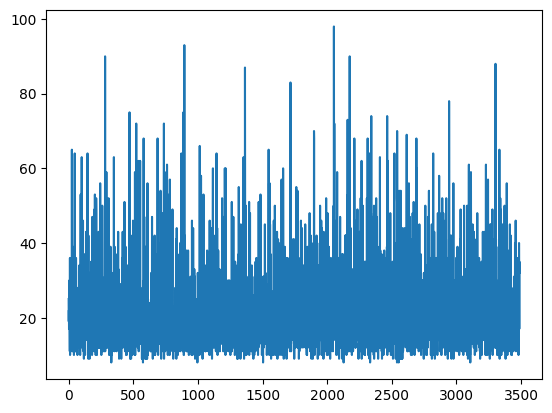

In [90]:
plt.plot(lst_r)

In [ ]:
Hin = ;padding=;dilation=;kernel_size=;stride= ;
(Hin​+2×padding−dilation×(kernel_size[0]−1)−1​)/stride+1